In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/dataset/report_2018-2019.csv")

In [4]:
data

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [5]:
data.isnull().sum()

Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.rename(columns={"Overall rank" : "Overall_rank",
                        "Country or region"         : "Country_or_region",
                        "GDP per capita"        : "GDP_per_capita",
                        "Social support"     : "Social_support",
                        "Healthy life expectancy"     : "Healthy_life_expectancy",
                   "Freedom to make life choices"     : "Freedom_to_make_life_choices",
                   "Perceptions of corruption"     : "CPerceptions_of_corruption"}, 
           inplace=True, errors='ignore')

In [11]:
data

,Overall_rank,Country_or_region,Year,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,CPerceptions_of_corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


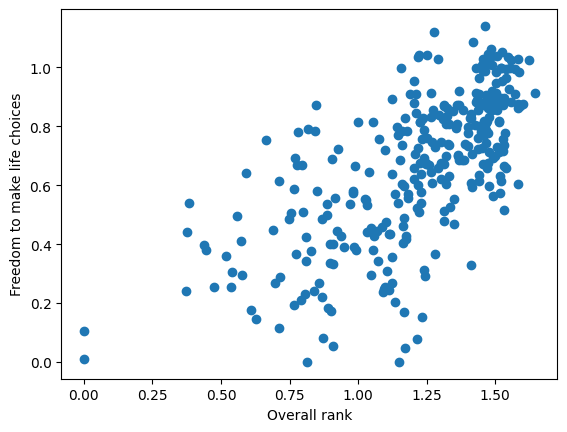

In [26]:
plt.scatter(data.Social_support,data.Healthy_life_expectancy) #x ve y koordinatlarına hangi sütunların geleceği belirlenir.
plt.xlabel("Social_support") #x ekseninin adı atanır
plt.ylabel("Healthy_life_expectancy")    #y ekseninin adı atanır.

plt.show()

In [28]:
x = data.Social_support.values  

In [29]:
x.shape

(312,)

In [31]:
x = data.Social_support.values.reshape(-1,1)
y = data.Healthy_life_expectancy.values.reshape(-1,1)

In [32]:
from sklearn.linear_model import LinearRegression
#sklearn kütüphanesinin içinde machine learning modelleri bulunur.

linear_reg = LinearRegression() #LinearRegression modeli linear_reg adlı variable'a eşitlenir.
linear_reg.fit(x,y)             #line fit edilir.

LinearRegression()

In [33]:
#prediction
import numpy as np

b0 = linear_reg.predict([[0]]) #fit edilen line'ın b0 değişkenine yani y eksenini kestiği noktaya bakılır.
print("b0: ",b0)

b0:  [[-0.01969609]]


In [34]:
b0_ = linear_reg.intercept_    #ayrıca b0 değeri değeri intercept methoduyla da bulunur.
print("b0: ",b0_)

b0:  [-0.01969609]


In [35]:
b1 = linear_reg.coef_  #b1'in diğer adı coefficient'tır. coef methoduyla b1 değeri bulunur.
print("b1: ",b1) 

b1:  [[0.5623258]]


In [36]:
new_salary = 1663 + 1138*11 #11 yıllık deneyimi olan birinin maaşı linear regression denklemine göre hesaplanmıştır.
print(new_salary)

14181


In [37]:
b11 = linear_reg.predict([[11]])  #11 yıllık deneyimi olan birinin maaşı predict methoduyla bulunur.
print("b11: ",b11)

b11:  [[6.16588769]]


In [38]:
y_head = linear_reg.predict(x)

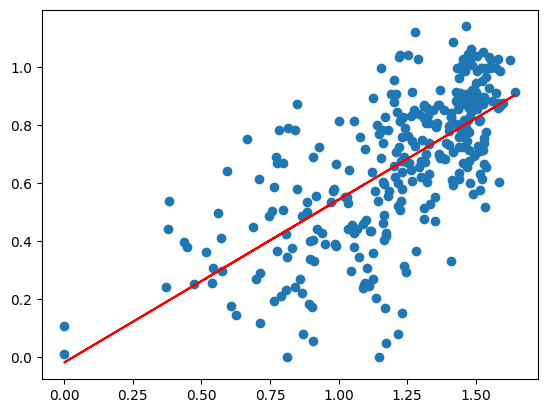

In [39]:
plt.plot(x, y_head, color="red")
plt.scatter(x,y)
plt.show()

In [40]:
from sklearn.metrics import r2_score
print("R Square Score: ",r2_score(y,y_head))

R Square Score:  0.4465012547239853


In [41]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y,y_head))

Mean Squared Error:  0.03523834304956089


In [42]:
MSE = np.square(np.subtract(y,y_head)).mean()
print("Mean Squared Error: ",MSE)

Mean Squared Error:  0.03523834304956089
